### Theory
We will start with some theory before we jump into solving the problems using python. Multivariate optimization is probably one of the most important bedrocks of machine learning. Most of the functions we see in real-life are actually multivariate meaning that they have more than one input variable. 
<br>For single variable functions like: Speed of an object with constant acceleration is given by $v_t$ = $v_0 + \frac{1}{2}\times a\times t^2$
<br>Where $v_0$ is the initial velocity $v_t$ is the velocity at time t and a is the acceleration. In-fact this is one of the outcome of Newton's Laws of Motion (also the man who is responsible for calculus). We will not dive into the depth of univariate optimization because principles applicable to multivariate are derived from univariate analysis.
<br>However, we will use one of the main results which is the Taylor's theorem. Which says any continuous - differentiable function can be expressed as a series which is:
          ***<br><center>$f(x) = f(a) + \frac{f'(a)}{1!} \times (x-a) + \frac{f''(a)}{2!} \times (x-a)^2 + \frac{f'''(a)}{3!} \times (x-a)^3 ... \infty$ </center>***
    <br>This is the most important result we will be using continuously for our analysis. Let us start extending this to the multivariate case straight away. For multivariate analysis we try to arrive at a quadratic approximation of a function, we will come to that soon.  
    
#### Quadratic Approximation
Using Taylor's series any function can be approximated as a quadratic function which is simply taking first 3 terms of the function. 
1. $f(x_0)$ is the value of function at point $x_0$
2. $\frac{f'(x_0)}{1!} \times (x-x_0)$ is the first derivative at point $x_0$ times $(x-x_0)$
3. $\frac{f''(a)}{2!} \times (x-a)^2$ is the second derivative at $x_0$ times $(x-x_0)^2$

<br>Essentially if $Q_x(x_0)$ is the quadratic approximation of function f(x) at $x_0$ then $Q_x(x_0)$ can be written as:
<br><center>$Q_x(x_0) = f(x_0) + \frac{f'(x_0)}{1!} \times (x-x_0) + \frac{f''(x_0)}{2!} \times (x-x_0)^2$ </center>
<br>You may ask why quadratic approximation why not cubic or higher order there are two reasons for the same:
1. Quadratic functions form parabolas (in 2D) and parabolids (in higher dimensions) and they have unique maxima and minimas
2. After $2^{nd}$ degree most of the functions become so low for the difference between (X and $X_0$) that we can ignore them
<br>***NOTE*** We are trying to map the behavior of a function in close vicinity to identify maxima and minima therefore point 2 become relevant this doesn't mean that all functions have very low 3rd degree term for all values. However, for this specific purpose where we are trying to map the behavior of function in very close vicinity this becomes a helpful tool. We will come to this in a bit. 

#### Why looking at the function in vicinity
Look at the graph below, this is plot of sin(x) + cos(x) in the given range there are 4 valleys and 4 tops, and there is are two criss-cross valleys along maximum and minimum. 
<br>Now as you would have observed any graph, when magnified to a large extent will turn into a flat graph. Now when the graph turns flat a small movement in any direction can be easily approximated by a quadratic function. 
<br>Why not a linear function? 
<br>Well, then you cannot find a maxima you have to simplify the assumption only to the level that it serves the purpose. Another reason for using quadratic as I told was it forms a parabolid which has a definite maxima/ minima. Let us see curve of $x^2 + y^2$ v/s $x^3 + y^3$ to see definite maxima/ minima. 

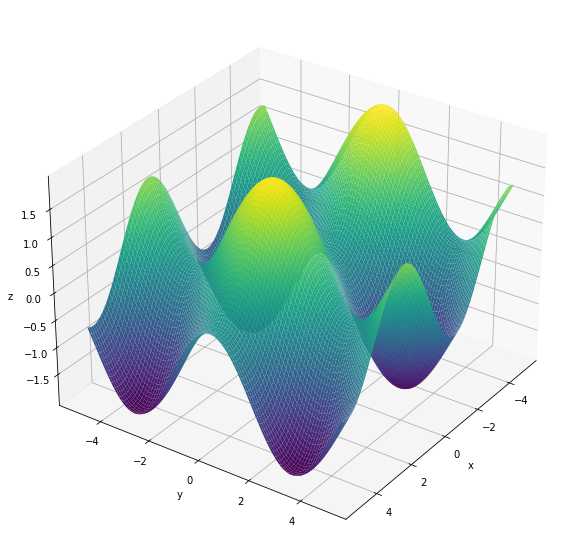

In [1]:
import matplotlib.pyplot as plt
import numpy as np
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,35)

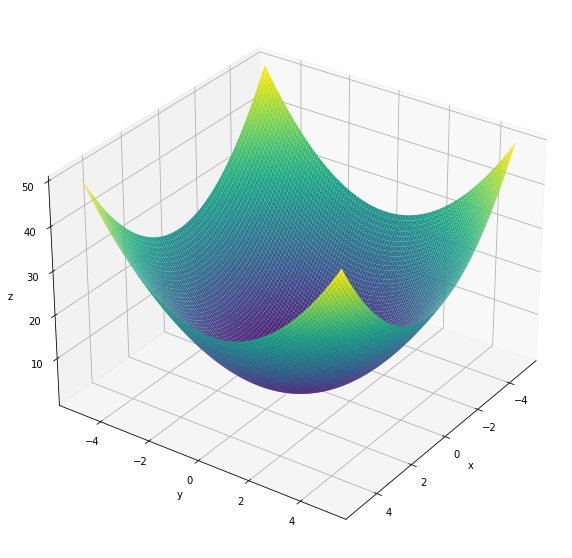

In [2]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,35)

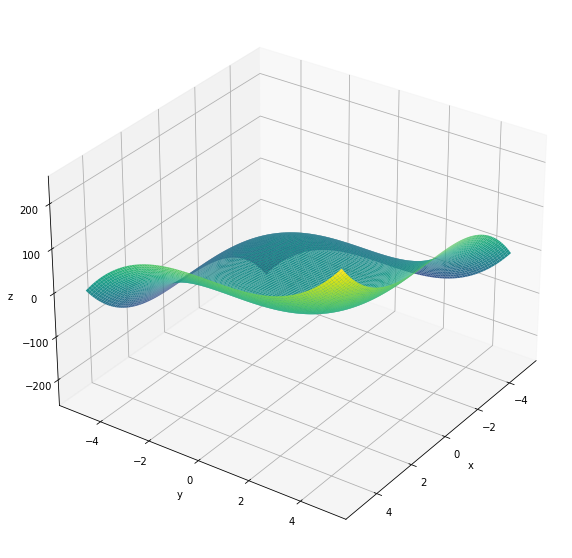

In [3]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return x**3 + y**3

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,35)

**Quadratic functions are more tractable than cubic functions**
<br>As we can see above finding a maxima for a quadratic functions is a lot more easier than for a cubic function so once we have found out a critical region (where the derivative of the function becomes 0) we can use quadratic approximation to classify the point as point of minima/ maxima. 
<br>There is a more formal proof of this using the Taylor's series, but I thought a visual intuition will be a better way to understand. 

Now that we have established quadratic approximation can be used for identification of maxima and minima points. Let us extend our argument for more than one variables to create a step-by-step process to identify the possible solutions, we will try to solve all of this using python.
##### Extending Quadratic Approximation to 2 functions of two-variables:
Let us start our simplest case of multi-variate function using function of two variables given by f(x,y) = z. Quadratic approximation of the same is given by:
<br><center> $Q(x,y) = f(x_0,y_0) + f_x(x_0,y_0) \times (x - x_0) + f_y(x_0,y_0) \times (y-y_0) + \frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0) + f_{yx}(x_0,y_0) \times (x-x_0)(y-y_0)]$ </center>
<br>**WOAH!!!** That is some big-a** function, let us break that down into it's component to understand what each of the elements of the function mean and how do we extend our argument of minimization from single-variable functions to a function of two variables and then subsequently generalize it.
<br>As we can see there are 3 distinct component of the function $Q(x,y)$ above we are evaluating it at x,y in vicinity of $x_0$ and $y_0$:
1. $f(x_0,y_0)$ is basically the value of the function at points $x_0$ and $y_0$
2. $f_x(x_0,y_0)(x-x_0) + f_y(x_0,y_0)(y-y_0)$ is the first order derivative evaluated at $x_0 and y_0$ multiplied by respective x and y values
3. $\frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0) + f_{yx}(x_0,y_0) \times (x-x_0)(y-y_0)]$ which simplifies to $\frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + 2f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0)]$ because for continuous functions $f_{xy} = f_{yx}$ which is the second order derivative term
<br>Let us sort out a couple of definitions first:
**TANGENT PLANE**:
<br>Equation of a tangent plant at $x_0$ and $y_0$ is given by $f(x_0,y_0) + f_x(x_0,y_0)\times (x-x_0) + f_y(x_0,y_0) \times (y-y_0)$. Let us try to understand this equation is single degree because of multiplication by $(x-x_0)$ and $(y-y_0)$ $f_x(x_0,y_0)$ and $f_y(x_0,y_0)$ is the slope of the curve at $(x_0,y_0)$ and this also passes through $f(x_0,y_0)$. So we can define any tangent plane by the following equation:
<br><center> $T_x(x_0,y_0) = f(x_0,y_0) + f_x(x_0,y_0)\times (x-x_0) + f_y(x_0,y_0) \times (y-y_0)$ </center>
<br>Now remember at critical point (where $f_x(x,y) = f_y(x,y) = 0$ will have horizontal tangent planes which is also the definition of maxima/ minima condition. 
<br>Let us try to understand it via two examples 

*QUESTION 1*
<br> f(x,y) = $2x^2 + y^2$ find the equation of tangent plant at point (1,2)
<br> Also find critical point and find the equation of tangent plane there. 
*SOLUTION 1*:
<br>Here the value of $f_x(x,y) = 4x$ and $f_y(x,y) = 2y$ $\to$ slope of tangent point is given by 4x1 = 4 and 2x2 = 4 from above equation can be given by $T_x(x_0,y_0) = f(x_0,y_0) + f_x(x_0,y_0)\times (x-x_0) + f_y(x_0,y_0) \times (y-y_0)$
<br>which is $T_x(1,2) = f(1,2) + 4(x-1) + 4(y-2)$; 
<br>f(1,2) = $2 \times 1^2 + 2^2 = 6$ putting in the equation the equation above becomes
<br>$T_x(1,2) = 6 + 4x - 4 + 4y - 8 \to T_x(1,2) = 4x+4y-6$
<br>Which you can see from plot 1 below it is touching the paraboloid at point (1,2) you can try and rotate the graph to see it

<br>For the equation of tangent plane at critical point we need to find the critical point which can be computed by equating both $f_x(x,y) and f_y(x,y)$ to Zero and finding value for x,y.
<br>$f_x(x,y) = 4x$ and $f_y(x,y) = 2x$ equating them to Zero we get x=0 and y=0. So our critical point is at (0,0) Origin
<br>Now slope of tangent plane at critical point is 0 (Which is by definition and also by the above equation where we equated $f_x(x,y)$ and $f_y(x,y)$ to Zero. 
<br>So equation to tangent plane beccomes $T_x(x_0,y_0) = 0$ which essentially means Z = 0 
<br>Let us plot the same in second graph.

In [4]:
!pip install plotly

In [6]:
#PLOT 1
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),2*x**2 + y**2)
plane = sp.lambdify((x,y),4*x+4*y-6)
plane2 = sp.lambdify((x,y),x+y)
import numpy as np
points = np.linspace(-5,5,90)
x,y = np.meshgrid(points,points)

import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = paraboloid(x,y)),go.Surface(z = plane(x,y))])
fig.show()

In [7]:
#PLOT 2
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),2*x**2 + y**2)
#plane = sp.lambdify((x,y),4*x+4*y-6)
plane2 = sp.lambdify((x,y),x+y)
import numpy as np
points = np.linspace(-5,5,90)
x,y = np.meshgrid(points,points)

import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = paraboloid(x,y)),go.Surface(z = 0*plane2(x,y))]) #Any equation multiplied by 0 is z= 0
fig.show()

One more interesting property of the tangent plane is when it is horizontal there may be 3 situations:
1. The point is maxima
2. Point is minima
3. Point is a saddle point
<br>Let us try to understand how do we know which one is which, for the same we will have to go to the third element of our equation:
<br><center>$\frac{1}{2}[f_{xx}(x_0,y_0) \times (x-x_0)^2 + f_{yy}(x_0,y_0) \times (y-y_0)^2 + 2f_{xy}(x_0,y_0) \times (x-x_0)(y-y_0)]$ </center>
<br>Which when converted to vector form becomes:
<br> <center>$\frac{1}{2}(x-x_0)^T \times H_f(x_0,y_0) \times (x-x_0)$</center>
<br>Here $H_f$ is the Hessian Matrix which is evaluated at point $x_0,y_0$ which is nothing but a matrix comprising of double derivatives evaluated at point $x_0$ and $y_0$. 
<br> If we go back to our quadratic approximation expression it becomes in vector form:
<br><center> Q(x,y) =  $f(x_0)$ + $\Delta f(x_0)(x-x_0) + \frac{1}{2}(x-x_0)^T \times H_f(x_0,y_0) \times (x-x_0)$</center>
<br>*NOTE* Here $x_0$ is not the x variable but a vector comprising of $[x_0, y_0]$
<br>Now, as a condition for minima/ maxima we have established that $2^{nd}$ term i.e. $\Delta f(x_0)(x-x_0)$ is Zero so now if we rearrange the above equation we get:
<br> <center>Q(x,y) - $f(x_0,y_0)$ = $\frac{1}{2}(x-x_0)^T \times H_f(x_0,y_0) \times (x-x_0)$</center>
<br>If term on RHS $\gt$ 0 means a small movement in x or y around $x_0$ or $y_0$ is going to increase the value of function $\to$ $f(x_0,y_0)$ is the minima and if RHS $\lt$ 0 means vice-versa and the function is going to decrease means that is the maxima. (**Argument here is if a function has reached a minima any movement around it is going to increase the value and vice-versa**). 

<br>What if the second derivative is also Zero then we move to the third derivative in that case. This is where properties of $H_x(x_0,y_0)$ comes really handy. We will not be proving them, they are pretty intuitive with the discussion we have had:
1. If Determinant of $H_x(x_0,y_0)$ is $\gt$ 0 then there are solutions to maxima and minima problem:
    a. If all the eigen values of the matrix are positive $\to$ minima
    b. If all the eigen values of the matrix are negative then the critical point $(x_0,y_0)$ is a maxima
2. If the Determinant of $H_x(x_0,y_0)$ is $\lt$ 0 $\to$ the value is a saddle point
3. If Determinant of $H_x(x_0,y_0)$ is $=$ 0 $\to$ we need to investigate further (go to higher order derivatives)

##### Summarizing 
In order to compute the maxima/minima or to identify them we follow following steps:
1. **COMPUTE CRITICAL POINT** This is done via equating first derivative = 0 i.e $f_x(x,y) = 0$ and $f_y(x,y) = 0$ solve for x,y all pairs of (x,y) will be the critical points. 
2. Compute H_x(x,y) for all pairs of (x,y) which is nothing but $\begin{bmatrix} f_{xx}(x,y) & f_{xy}(x,y) \\ f_{xy}(x,y) & f_{yy}(x,y)\end{bmatrix}$
    a. If the determinant value is > 0 means there is either a maxima/ minima depending on the eigen values (Negative - Maxima; Positive - Minima)
   <br> b. If the determinant value is < 0 means this is a saddle point
    <br>c. If determinant value is Zero then we need further investigation 

#### Problems and Solutions
**QUESTION 1**:
<br>Let us try to solve this following equation:
<br> f(x,y) = $x^4 -4x^2 + y^2$
<br>Let us first plot the function (just for fun we don't need to plot every function to do the analysis)


In [8]:
import sympy as sp
x,y = sp.symbols('x y')
function = sp.lambdify((x,y),x**4 - 4*x**2 + y**2)
import numpy as np
points = np.linspace(-3,3,100)
x,y = np.meshgrid(points,points)
import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = function(x,y))])
fig.show()

Looks like a bed of a river with a bit of elevation at the center. Now let us try to differentiate the function using ```sympy```

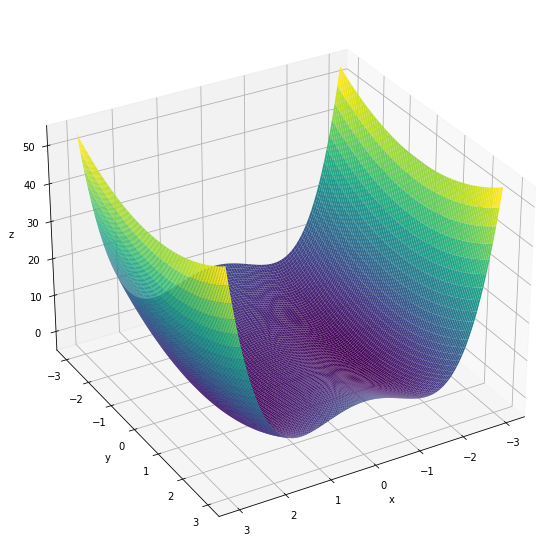

In [9]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return x**4 - 4*x**2 + y**2

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,60)

In [10]:
x,y = sp.symbols('x y')
function = x**4 - 4*x**2 + y**2
function
sp.solve(sp.Eq(sp.diff(function,x),0))

[0, -sqrt(2), sqrt(2)]

In [11]:
##Similarly solving for y
sp.solve(sp.Eq(sp.diff(function,y),0))

[0]

In [12]:
sp.diff(function,y)

2*y

In [13]:
sp.diff(function,x,2)

4*(3*x**2 - 2)

This means our solution set is:
1. (0,0)
2. (-$\sqrt{2}$,0)
3. ($\sqrt{2}$,0)

<br>Now let us compute the Hessian Matrix for each of these points for which we need to compute following 3 quantities:
1. $f_{xx}(x_0,y_0)$ where $x_0$ and $y_0$ are each of the above points
2. $f_{xy}(x_0,y_0)$ where $x_0$ and $y_0$ are each of the above points
3. $f_{yy}(x_0,y_0)$ where $x_0$ and $y_0$ are each of the above points
<br>Each of these quantities can be computed easily using our ```sympy``` package

In [14]:
sp.diff(function,y,2)
#This is independent of x_0 and y_0 so will be constant

2

In [15]:
case_1 = sp.diff(function,x,2).subs([(x,np.sqrt(2))])
case_2 = sp.diff(function,x,2).subs([(x,-np.sqrt(2))])
case_3 = sp.diff(function,x,2).subs([(x,0)])
print(f"Case_1:{case_1}, Case_2:{case_2}, Case_3:{case_3}")
#We will create 2 Hessian Matrix because case1 and case 2 are same

Case_1:16.0000000000000, Case_2:16.0000000000000, Case_3:-8


In [16]:
sp.diff(function,x,y)
#The value of f_xy and f_yx = 0

0

Means our hessian matrix will look like
<br>$\begin{bmatrix} f_{xx}(x,y) & 0 \\ 0 & 2\end{bmatrix}$
<br>Where $f_{xx}(x,y)$ will take values as per case_1, case_2 or case_3

In [17]:
mat_1 = np.array([[case_1,0.0],[0.0,2.0]],dtype = 'float')
mat_2 = np.array([[case_3,0],[0,2]],dtype='float')

In [18]:
np.linalg.eig(mat_1)

(array([16.,  2.]),
 array([[1., 0.],
        [0., 1.]]))

We have 2 eigen values 16 and 2 both of which are positive means we can conclude this is the local minima at $\sqrt{2}$ and -$\sqrt{2}$

Now let us compute for case 3 where our x value is 0 therefore the Hessian Matrix is:
<br>$\begin{bmatrix} 0 & 0 \\ 0 & 2\end{bmatrix}$

In [19]:
np.linalg.eig(mat_2)

(array([-8.,  2.]),
 array([[1., 0.],
        [0., 1.]]))

As we can see we get a mixture of positive and negative values meaning (0,0) should be a saddle point.Thus,we have Minima at (+/-$\sqrt{2},0)$ and saddle point at (0,0)

This you can observe in the graph as well while there are definite decrease at ($\sqrt{2}$,0) and (-$\sqrt{2}$,0), at (0,0) we can see that the points increases and then decreases. 

#### Gradient Descent
Kind of functions we were solving till now were very tractable meaning their first derivative could be equated to Zero and we could find the value of (x,y) easily and therefore find all the possible set of critical points and check each one of them for them being minimas/ maximas. 
<br>However, in real life this situation will occur seldom. Couple of reasons for the same:
1. Number of variables will generally will not be 2 or 3 but may go as high as couple of 100s
2. The functions will not be continuous and cannot generally be expressed via single equations
3. Even if they are their derivative = 0 might be impossible or at best very expensive to compute

<br>Therefore in real-life machine learning problems we use a method called ***Gradient Descent*** which does compute the first derivative but avoids equating it to Zero to find the set of critical points. One thing to note here is while we have been computing derivatives using the available formulas for $x^n$ or trignometric functions. The fundamental definition of derivative:
<br><center> $f'(x) = \lim_{h \to 0}\frac{f(x+h) - f(x)}{h}$</center>
<br>Now this definition is more universal (and fundamental) therefore can even be applied to functions which might not have simpler forms. Which, we are generally used to. 

**Steps for Gradient Descent**
1. Choose a starting point for our Gradient Descent Analysis
2. Compute the Derivative of the function at the point (either by analytical methods or via limits)
3. Negate the derivative we want to move in the direction where the function is reducing
4. Chose new point $X_{k+1}$ = $X_k$ - $\frac{df(x)}{x}$ $\times$ $\alpha$
<br>Here $\alpha$ is the learning rate of the function, basically meaning how fast we are moving to the optimum.

**Why do we take negative of the gradient?**
<br>Well gradient is the direction of maximum change and we want to minimize our function (generally in machine learning we tend to minimize the cost function) therefore we want to move in the maximum reduction which is exactly opposite of the gradient of the function. This is more critical to understand for variables in more than 2 dimensions, which we will come to soon. 

<br>Let us build the intuition by using a single variable function first:
<br>Let us take an example of a function y = $(x-7)^2$. Let us try to plot the function first. 
<br>**NOTE:** This is an analytically tractable function and even the minima can be extracted via visual inspection. 

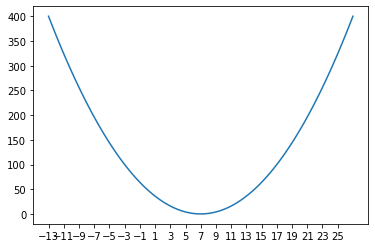

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-13,27,100) #Took 13 to 27 so as to make the graph symmetrical
y = (x-7)**2
fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_xticks(np.arange(-13,27,2))
plt.show()

We can see clearly the graph is minimum at value = 7. Now let us try to implement gradient descent:
1. Step 1 - Choose the starting point let us choose our starting point be 3
2. Step 2 - Compute the derivative of the function which is 2(x-7) and at x = 3 gradient is -8
3. Step 3 - Decide upon a learning rate let us assume it to be 0.1
4. Step 4 - $X_{k+1}$ = $X_k$ - $\frac{df(x)}{x}$ $\times \alpha$
<br>Here $\frac{df(x)}{x}$ = -8 for the starting point, $\alpha$ = 0.1
<br>We keep on repeating the step 4 updating value of $X_k$ and $\frac{df(x)}{x}$ for every $X_k$. 

<br> $X_{k+1}$ = 3 -  (-8)$\times$0.1 = 3 + 0.8 = 3.8
<br>**ITERATION 2**:
<br> Here our $X_{k}$ = 3.8, $\frac{df(x)}{x}$ = 2$\times(3.8-7)$ =  $\alpha$ = 0.1
<br>$X_{k+1} = 3.8 - 2\times(3.8-7)\times 0.1 = 3.8 - (-6.4)\times 0.1 = 4.44 $

<br>We run the algorithm when the difference between $X_{k+1}$ and $X_k$ becomes lower than a certain threshold say 0.00001.

<br>Let us write a function for the same:

In [21]:
import numpy as np
import sympy as sp
x = sp.symbols('x')
func = (x-7)**2
sp.diff(func,x)

2*x - 14

We will use our recursive function again here which takes in inputs as follows:
1. Func = Which is the function we are trying to minimize (note this function can be a function in x only because the way we have treated it inside the function ```sp.diff(func,x).subs([(x,x_in)])```. 
2. max_iter = 1000; 1000 is the maximum number of iterations the function goes through so as to avoid infinite loop
3. threshold = 0.00001; this is one more stopping condition when the difference between $X_{k+1}$ and $X_k$ becomes below 0.00001 the loop stops
4. LR = 0.1; Learning rate this is the rate at which the function approaches the minima
5. Our beloved counter which is essentially to see how many iterations were required

<br>Now the number of loops run depends on the Learning Rate this needs to have a sweet balance:
1. If Learning rate becomes too low the function approaches the minima at a very slow rate
2. If it becomes too high the function may jump a lot and never end up reaching the point of minima

<br>Let us explore the same using a graphical example. 
<br>For plotting we will not be using recursive function 

In [22]:

def grad_desc(func,x_in,max_iter = 1000, threshold = 0.00001, LR = 0.1,counter = 1):
    x_out = x_in - sp.diff(func,x).subs([(x,x_in)])*LR
    #print(func)
    print(f"Value of x in {counter} iteration is {x_out} and the difference is {abs(x_out - x_in)}")
    #print(counter)
    counter+=1
    if counter>=max_iter or abs(x_in-x_out) <= threshold:
        return(x_out)
    else:
        return grad_desc(func,x_in = x_out,counter = counter)

In [23]:
import numpy as np
import sympy as sp
x = sp.symbols('x')
func = (x-7)**2
grad_desc(func,x_in = 3)


Value of x in 1 iteration is 3.80000000000000 and the difference is 0.800000000000000
Value of x in 2 iteration is 4.44000000000000 and the difference is 0.640000000000000
Value of x in 3 iteration is 4.95200000000000 and the difference is 0.512000000000000
Value of x in 4 iteration is 5.36160000000000 and the difference is 0.409600000000000
Value of x in 5 iteration is 5.68928000000000 and the difference is 0.327680000000000
Value of x in 6 iteration is 5.95142400000000 and the difference is 0.262144000000000
Value of x in 7 iteration is 6.16113920000000 and the difference is 0.209715200000000
Value of x in 8 iteration is 6.32891136000000 and the difference is 0.167772160000000
Value of x in 9 iteration is 6.46312908800000 and the difference is 0.134217728000000
Value of x in 10 iteration is 6.57050327040000 and the difference is 0.107374182400000
Value of x in 11 iteration is 6.65640261632000 and the difference is 0.0858993459199997
Value of x in 12 iteration is 6.72512209305600 and 

6.99996346245907

Now we will try to plot the function to understand the impact of learning rate on the rate and way we reach the minima. We will use a ```while``` loop instead of a recursive function, because it becomes easier to manage. (*Or may be I don't know how to manage recursive algorithm along with returning the value of x_in while the algorithm is running*)
<br>We can use the variables in the PARAMETER VALUE segment we can change the values to understand, we can also plot the functions. Try out values of LR as:
1. 1
2. 2
3. 0.8
<br>We can see the impact of the same on the graph below to understand how the graph moves. 
<br>Let us move to the multivariate function for gradient descent. 

In [24]:
import numpy as np
import sympy as sp
x = sp.symbols('x')
func = (x-7)**2
sp.diff(func,x)
a = []
counter = 1

                                                ##PARAMETER VALUES#####
LR = 0.1
threshold = 100
x_in = -5


x_out = 0


while threshold >= 0.00001 and counter <= 1000:
    x_out = x_in - sp.diff(func,x).subs([(x,x_in)])*LR
    threshold = abs(x_in - x_out)
    counter+=1
    
    a.append(x_in)
    x_in = x_out
    print(x_in)
#Try changing LR to 1 or 2 you will see why LR is important 

-2.60000000000000
-0.680000000000000
0.856000000000000
2.08480000000000
3.06784000000000
3.85427200000000
4.48341760000000
4.98673408000000
5.38938726400000
5.71150981120000
5.96920784896000
6.17536627916800
6.34029302333440
6.47223441866752
6.57778753493402
6.66223002794721
6.72978402235777
6.78382721788622
6.82706177430897
6.86164941944718
6.88931953555774
6.91145562844619
6.92916450275696
6.94333160220556
6.95466528176445
6.96373222541156
6.97098578032925
6.97678862426340
6.98143089941072
6.98514471952858
6.98811577562286
6.99049262049829
6.99239409639863
6.99391527711891
6.99513222169512
6.99610577735610
6.99688462188488
6.99750769750790
6.99800615800632
6.99840492640506
6.99872394112405
6.99897915289924
6.99918332231939
6.99934665785551
6.99947732628441
6.99958186102753
6.99966548882202
6.99973239105762
6.99978591284609
6.99982873027688
6.99986298422150
6.99989038737720
6.99991230990176
6.99992984792141
6.99994387833713
6.99995510266970
6.99996408213576


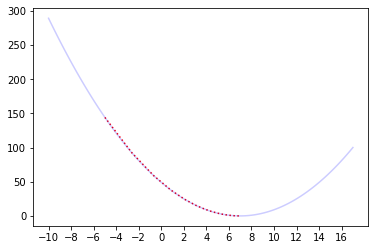

In [25]:
import matplotlib.pyplot as plt
y = [(i-7)**2 for i in a]
plt.plot(a,y,color='red',linestyle = 'dotted') #dotted, loosely dotted, densly dotted, 
x = np.linspace(-10,17,100)
z = [(i-7)**2 for i in x]
plt.plot(x,z,alpha = 0.2,color = 'blue')
plt.xticks(np.arange(-10,17,2))
plt.show()

#### Multivariate function gradient descent
Let us take an example f(x,y) = $x^3 \times sin(y)$. Let us plot the function first to understand the fabric of the function
<br>Also, let us plot it in variable form to understand the nature of the graph. 

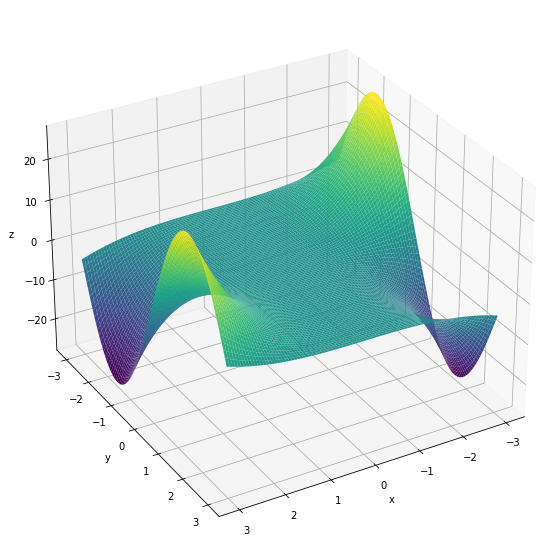

In [26]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
def f(x, y):
    return (x**3)*np.sin(y)

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,60)

In [27]:
import sympy as sp
x,y = sp.symbols('x y')
function = sp.lambdify((x,y),(x**3)*sp.sin(y))
import numpy as np
points = np.linspace(-3,3,100)
x,y = np.meshgrid(points,points)
import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = function(x,y))])
fig.show()

Looks like some twisted table. Well might be an interesting function to run the gradient descent on this function. 

##### Fundamental Concept
The fundamental concept of the gradient descent doesn't change we compute:
1. $\frac{\partial f(x,y)}{\partial x}$
2. $\frac{\partial f(x,y)}{\partial y}$

<br> $X_{k+1}$ = $X_k$ - $\alpha \times \frac{\partial f(x,y)}{\partial x}$
<br> $Y_{k+1}$ = $Y_k$ - $\alpha \times \frac{\partial f(x,y)}{\partial y}$

In [30]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.8/191.8 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.0 MB/s eta 0:00:0000:0100:01


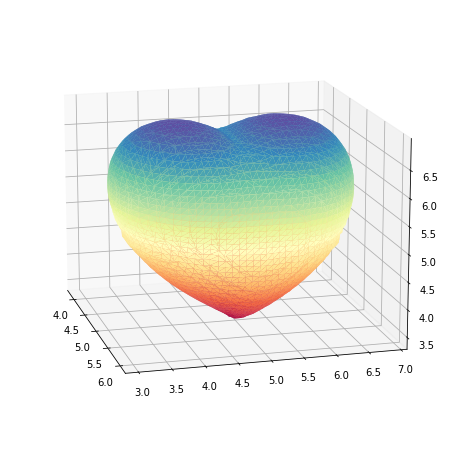

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
from skimage import measure


# Set up mesh
n = 100 

x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
z = np.linspace(-3,3,n)
X, Y, Z =  np.meshgrid(x, y, z)

# Create cardioid function 
def f_heart(x,y,z):
    F = 160 * ((-x**2 * z**3 -9*y**2 * z**3/80) +
               (x**2 + 9*y**2/4 + z**2-1)**3)
    return F

# Obtain value to at every point in mesh
vol = f_heart(X,Y,Z) 

# Extract a 2D surface mesh from a 3D volume (F=0)
verts, faces, normals, values = measure.marching_cubes(vol, 0, spacing=(0.1, 0.1, 0.1))


# Create a 3D figure
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)

# Change the angle of view and title
ax.view_init(15, -15)

# ax.set_title(u"Made with ❤ (and Python)", fontsize=15) # if you have Python 3


# Show me some love ^^
plt.show()

In [32]:
import numpy as np
a = np.array([[1,2],[6,43]])

In [33]:
a

array([[ 1,  2],
       [ 6, 43]])

In [34]:
np.linalg.eig(a)

(array([ 0.71620335, 43.28379665]),
 array([[-0.99008196, -0.04724662],
        [ 0.14049097, -0.99888325]]))